In [1]:
# `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Fri Feb 23 11:25:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import torch

# Check PyTorch GPU availability
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Is Available: {torch.cuda.is_available()}")
else:
    print("GPU is not available.")

GPU Name: Tesla T4
GPU Is Available: True


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Creating this symbolic link makes it easier to access your Google Drive files from the Colab notebook without having to type the full path /content/gdrive/My Drive/. After running this line, you can access your Google Drive root by referring to /mydrive in your code.
!ln -s /content/gdrive/My\ Drive/ /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [5]:
%cd /mydrive/yolov9

/content/gdrive/My Drive/yolov9


In [6]:
!git clone https://github.com/WongKinYiu/yolov9.git

In [7]:
%cd yolov9

/content/gdrive/My Drive/yolov9/yolov9


In [8]:
# !pip install -r requirements.txt

# Download yolov9 pretrained weights

In [9]:
!wget -P /mydrive/yolov9 https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt

!wget -P /mydrive/yolov9 https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt

# Download a test image for inference

In [10]:
# !wget -P /mydrive/yolov9 -q https://cdn.pixabay.com/photo/2020/04/18/12/23/woman-5059062_960_720.jpg

In [11]:
!python detect.py --weights /mydrive/yolov9/yolov9-e.pt --source /mydrive/yolov9/woman-5059062_960_720.jpg --device 0

detect: weights=['/mydrive/yolov9/yolov9-e.pt'], source=/mydrive/yolov9/woman-5059062_960_720.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/content/gdrive/My': No such file or directory
YOLOv5 🚀 2024-2-23 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/gdrive/My Drive/yolov9/woman-5059062_960_720.jpg: 448x640 1 person, 3 cars, 1 motorcycle, 1 dog, 208.7ms
Speed: 0.6ms pre-process, 208.7ms inference, 630.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


If you get this error:   AttributeError: 'list' object has no attribute 'device'

Then open utils/general.py file and go to line no 903 and write this prediction = prediction[0][1]

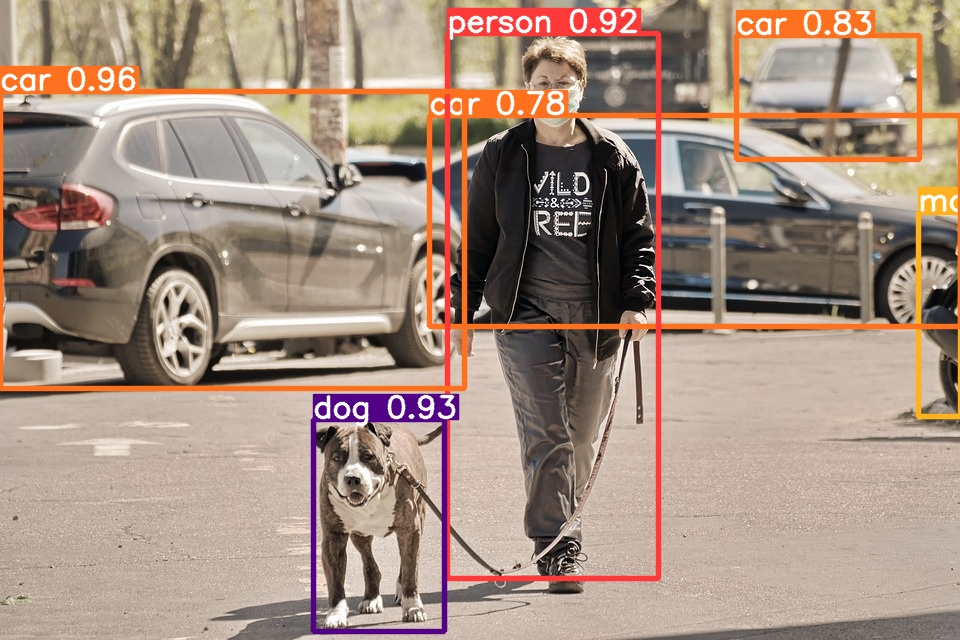

In [12]:
from IPython.display import Image

Image(filename=f"/mydrive/yolov9/yolov9/runs/detect/exp/woman-5059062_960_720.jpg", width=1000)

## Training yolov9 on custom dataset

#### Download Dataset: https://universe.roboflow.com/roboflow-100/furniture-ngpea

Paste the dataset folder in your drive

#####  1- In yolov9 repo paste this data.yaml file

##### 2- Create a copy of models/detect/yolov9.yaml file and name it yolov9_custom.yaml.
Open it and change the value of nc as per your custom model

In [49]:
#%cd yolov9

!python train_dual.py --workers 8 --batch 4  --img 640 --epochs 50 --data /mydrive/yolov9/yolov9/data.yaml --weights /mydrive/yolov9/yolov9-e.pt --device 0 --cfg /mydrive/yolov9/yolov9/models/detect/yolov9_custom.yaml --hyp /mydrive/yolov9/yolov9/data/hyps/hyp.scratch-high.yaml

2024-02-23 12:16:29.935892: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 12:16:29.935942: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 12:16:29.937324: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-23 12:16:31.731500: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train_dual: weights=/mydrive/yolov9/yolov9-e.pt, cfg=/mydrive/yolov9/yolov9/models/detect/yolov9_custom.yaml, data=/mydrive/yolov9/yolov9/data.yaml, hyp=/mydrive/yolov9/yolov9/data/hyps/hyp.scratch-high.yaml, epochs=50, batch_size=4, imgsz=6

Results are saved in runs/train/exp folder

In [32]:
# from IPython.display import Image

# Image(filename="/mydrive/yolov9/yolov9/runs/train/exp8/results.png", width=600)

##  Inference with Custom Model

In [51]:
!python detect.py --img 1280 --conf 0.1 --device 0 --weights /mydrive/yolov9/yolov9/runs/train/exp9/weights/best.pt --source /mydrive/yolov9/furniture.jpg

detect: weights=['/mydrive/yolov9/yolov9/runs/train/exp9/weights/best.pt'], source=/mydrive/yolov9/furniture.jpg, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/content/gdrive/My': No such file or directory
YOLOv5 🚀 2024-2-23 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9_custom summary: 700 layers, 60760882 parameters, 0 gradients, 264.9 GFLOPs
image 1/1 /content/gdrive/My Drive/yolov9/furniture.jpg: 864x1280 8 Chairs, 5 Sofas, 1 Table, 246.6ms
Speed: 1.3ms pre-process, 246.6ms inference, 718.5ms NMS per image at shape (1, 3, 1280, 1280)
Results saved to runs/detect/exp12


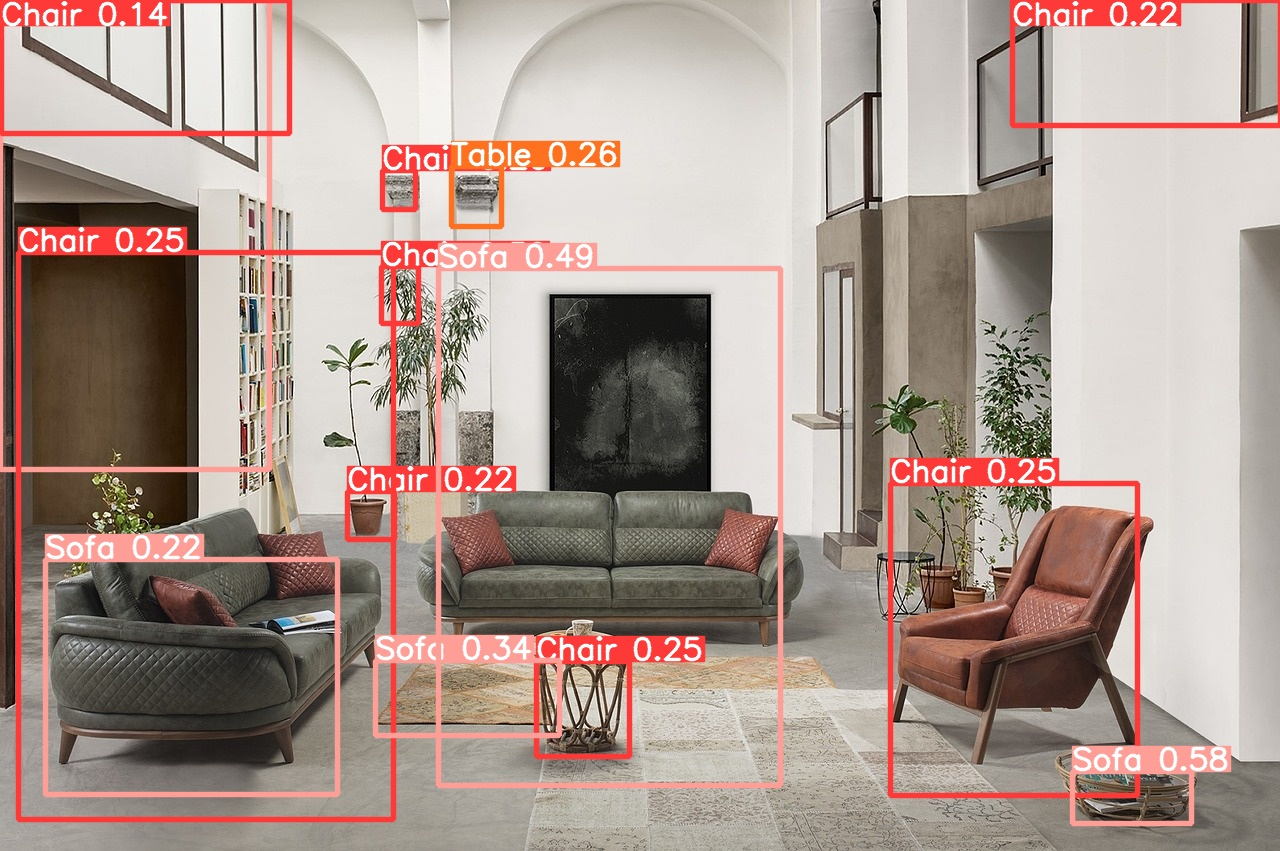

In [52]:
from IPython.display import Image
Image(filename="/mydrive/yolov9/yolov9/runs/detect/exp12/furniture.jpg", width=600)